In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

In [2]:
# Import our input dataset
file_path = Path('Resources/all_columns_df.csv')
graph_df = pd.read_csv(file_path)
graph_df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer_x,Critic_Score,User_Score,Year,Country,Total_Sales
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,2006.0,Japan,82.86
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,1985.0,Japan,40.24
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,Japan,37.14
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,2017.0,NaN,36.60
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,Japan,33.09


In [3]:
graph_df.count()

Rank            19862
Name            19862
Genre           19862
ESRB_Rating     13925
Platform        19862
Publisher       19862
Developer_x     19860
Critic_Score     4706
User_Score        238
Year            19859
Country         11877
Total_Sales     19862
dtype: int64

In [4]:
# Drop columns:
graph_df = graph_df.drop(['Rank', 'Name', 'Year', 'User_Score', 'ESRB_Rating', 'Publisher', 'Platform', 'Developer_x', 'Country'], axis = 1)
graph_df.head()

,Genre,Critic_Score,Total_Sales
0,Sports,7.7,82.86
1,Platform,10.0,40.24
2,Racing,8.2,37.14
3,Shooter,NaN,36.60
4,Sports,8.0,33.09


In [5]:
graph_df.count()

Genre           19862
Critic_Score     4706
Total_Sales     19862
dtype: int64

In [6]:
# Finding null values
for column in graph_df.columns:
    print(f'Column {column} has {graph_df[column].isnull().sum()} null values')


Column Genre has 0 null values
Column Critic_Score has 15156 null values
Column Total_Sales has 0 null values


In [7]:
graph_df = graph_df.dropna()
graph_df.count()

Genre           4706
Critic_Score    4706
Total_Sales     4706
dtype: int64

In [8]:
# Group Genre and sum
genre_graph_df = graph_df.groupby('Genre').sum()[['Total_Sales', 'Critic_Score']]
# genre_graph_df = genre_graph_df['Total_Sales'].map("{:,}".format)
# genre_graph_df = genre_graph_df.style.format({'Total_Sales': "{:,}", 'Year': "{:,}", 'Critic_Score': "{:,}",
genre_graph_df = genre_graph_df.sort_values(by=['Total_Sales'], ascending=False)  
genre_graph_df

,Total_Sales,Critic_Score
Genre,,
Action,790.06,5458.5
Shooter,756.78,4130.8
Role-Playing,752.86,4704.2
Sports,701.87,4157.6
Platform,616.06,2873.0
Racing,469.23,2426.2
Misc,366.05,1821.2
Fighting,246.05,1919.2
Adventure,236.65,1985.6


In [9]:
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple

C:\Users\adria\AppData\Local\Temp\ipykernel_12396\3761939136.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax2.grid(b=False) # turn off grid 2


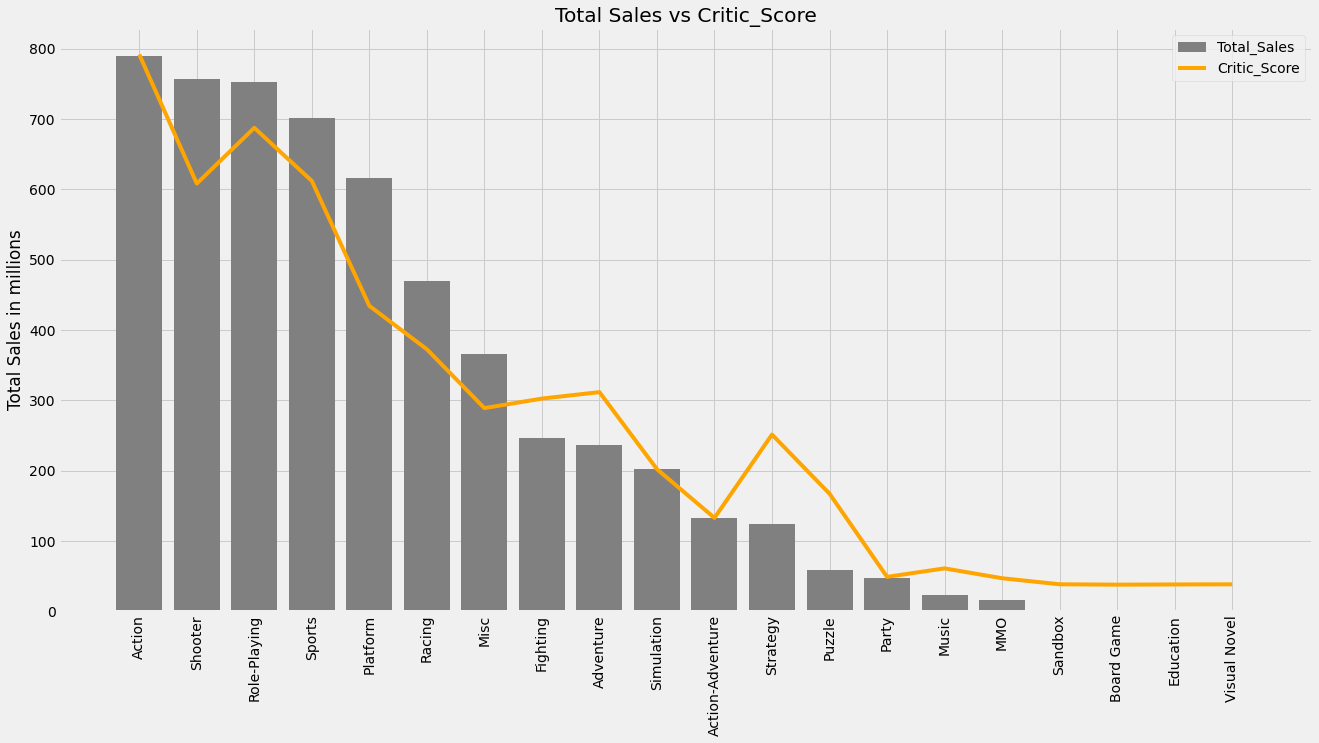

In [10]:
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)

#plt.axis('off')
#plt.tick_params(axis = 'y', right='off', labelright='off')


l1 = ax1.bar(genre_graph_df.index, genre_graph_df.Total_Sales, color='gray', label='Total Sales in millions')


# Set up grid 2
ax2 = ax1.twinx()
l2, = ax2.plot(genre_graph_df.Critic_Score, color='orange', label = 'Critic_Score')
ax2.grid(b=False) # turn off grid 2
#ax2.spines['right'].set_visible(False)
ax2.set_yticklabels([]) # Turn off tick labels

ax1.set_title('Total Sales vs Critic_Score')
ax1.set_ylabel('Total Sales in millions')
ax1.legend((l1, l2), ("Total_Sales", "Critic_Score"), loc = 'upper right')

plt.show()